In [45]:
import laspy
import numpy as np
import pdal
import matplotlib.pyplot as plt
from osgeo import gdal

### LV03 Bild erstellen

In [46]:
# LV03
json = """
[
    "lidardaten/2014/laz2014_609225.laz",
    {
        "type":"filters.crop",
        "bounds":"([609000,609150],[225000,225100])"
    },
    "output1.las"
]
"""


pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log


In [47]:
pdal_json = """
[
    "output1.las",
    {
        "type": "filters.delaunay"
    },
    {
        "type": "filters.faceraster",
        "resolution": 1
    },
    {
        "type": "writers.raster",
        "filename":"outputfile1.tif"
    }
]
"""

pipeline = pdal.Pipeline(pdal_json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

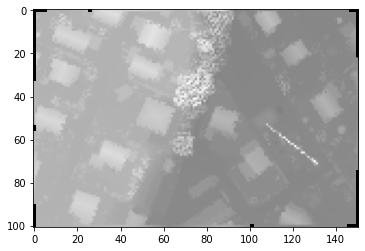

In [48]:
dataset1 = gdal.Open("outputfile1.tif") 
# Note GetRasterBand() takes band no. starting from 1 not 0
band1 = dataset1.GetRasterBand(1)
arr1 = band1.ReadAsArray()
plt.imshow(arr1,  cmap='gray', vmin=423, vmax=470)

### LV95 Bild erstellen

In [50]:
# LV95
json = """
[
    "lidardaten/2019/2609000_1225000.laz",
    {
        "type":"filters.crop",
        "bounds":"([2609000.325,2609150.324],[1225000.337,1225100.336])"
    },
    "output2.las"
]
"""

import pdal
pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [51]:
pdal_json = """
[
    "output2.las",
    {
        "type": "filters.delaunay"
    },
    {
        "type": "filters.faceraster",
        "resolution": 1
    },
    {
        "type": "writers.raster",
        "filename":"outputfile2.tif"
    }
]
"""

pipeline = pdal.Pipeline(pdal_json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

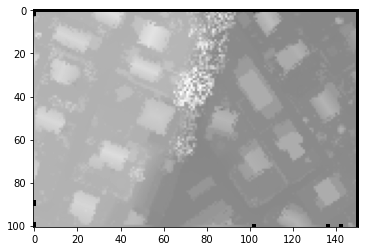

In [52]:
dataset1 = gdal.Open("outputfile2.tif") 
# Note GetRasterBand() takes band no. starting from 1 not 0
band2 = dataset1.GetRasterBand(1)
arr2 = band2.ReadAsArray()
plt.imshow(arr2,  cmap='gray', vmin=423, vmax=470)

### Differenzbild erstellen

In [53]:
dif = np.absolute(arr1-arr2)

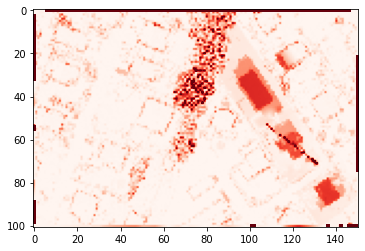

In [58]:
plt.imshow(dif,  cmap='Reds', vmin=-0, vmax=10)

In [59]:
print(dif.max())
print(dif.min())
print(dif.mean())
print(np.median(dif))

10463.29053614947
0.0
167.42308644519426
0.0940749378373198
